In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import xray
import pandas as pd
import seaborn as sns

Open netCDF file with several variables inside:

In [2]:
f = xray.open_dataset('./air.sig995.2012.nc')

In [3]:
f

<xray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 1464)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T06:00:00 ...
Data variables:
    air      (time, lat, lon) float64 235.3 235.3 235.3 235.3 235.3 235.3 ...
Attributes:
    Conventions: COARDS
    title: 4x daily NMC reanalysis (2012)
    description: Data is from NMC initialized reanalysis
(4x/day).  These are the 0.9950 sigma level values.
    platform: Model
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html
    history: created 2011/12 by Hoop (netCDF2.3)
Converted to chunked, deflated non-packed NetCDF4 2014/09

Mean over time

In [4]:
mmean = f.mean('time')

In [5]:
mmean

<xray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
Data variables:
    air      (lat, lon) float64 258.4 258.4 258.4 258.4 258.4 258.4 258.4 ...

In [6]:
mmean.air.shape

(73, 144)

Plot mean air temperature:

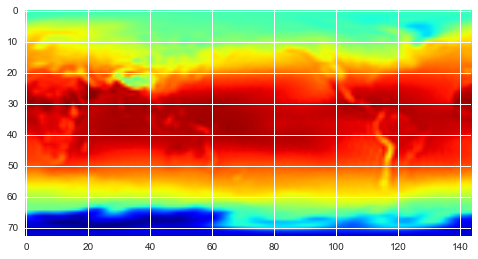

In [8]:
plt.imshow(mmean.air, cmap=plt.cm.jet);

Create time series for northern and southernd hemispheres:

In [9]:
mmean.lat

<xray.DataArray 'lat' (lat: 73)>
array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,
        67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,
        45. ,  42.5,  40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,
        22.5,  20. ,  17.5,  15. ,  12.5,  10. ,   7.5,   5. ,   2.5,
         0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
       -22.5, -25. , -27.5, -30. , -32.5, -35. , -37.5, -40. , -42.5,
       -45. , -47.5, -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. ,
       -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5, -90. ], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
Attributes:
    units: degrees_north
    actual_range: [ 90. -90.]
    long_name: Latitude
    standard_name: latitude
    axis: Y

In [10]:
north = mmean.loc[dict(lat=slice(90,0))]

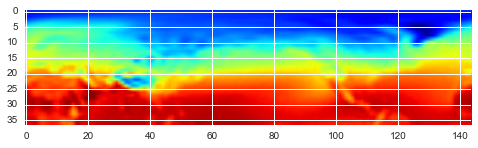

In [12]:
plt.imshow(north.air, cmap=plt.cm.jet)

In [13]:
south = mmean.loc[dict(lat=slice(0,-90))]

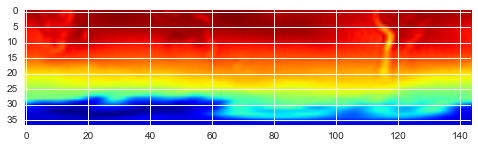

In [15]:
plt.imshow(south.air, cmap=plt.cm.jet)

In [16]:
north_tm = f.air.loc[dict(lat=slice(90,0))].mean(['lat','lon'])
south_tm = f.air.loc[dict(lat=slice(0,-90))].mean(['lat','lon'])

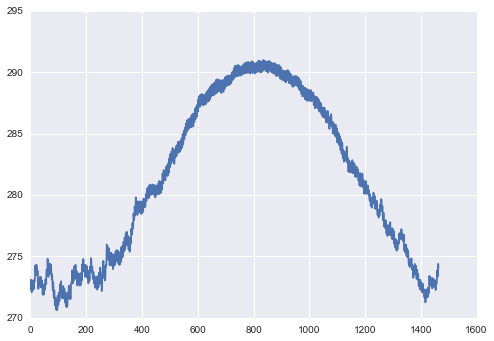

In [18]:
plt.plot(north_tm)

In [19]:
north_tm

<xray.DataArray 'air' (time: 1464)>
array([ 272.60449235,  272.36021593,  273.10420985, ...,  273.49242354,
        274.3929871 ,  274.09615897])
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T06:00:00 ...

In [20]:
dfn = north_tm.to_dataframe()
dfs = south_tm.to_dataframe()

In [21]:
df = pd.DataFrame(index=dfn.index)
df['north'] = dfn.air
df['south'] = dfs.air

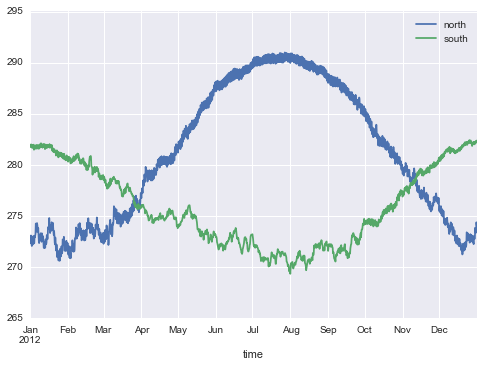

In [22]:
df.plot()

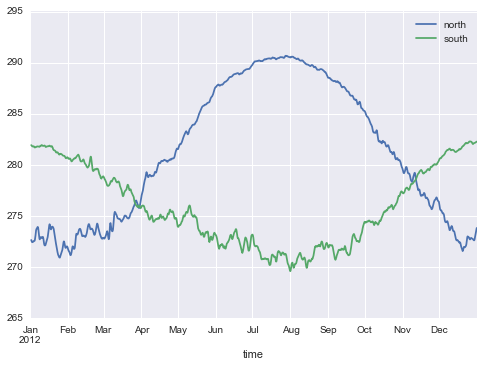

In [23]:
smoothed = pd.rolling_mean(df, 4)
smoothed.plot()

Convert back to xray Dataset:

In [24]:
tr = xray.Dataset.from_dataframe(smoothed)

In [25]:
tr

<xray.Dataset>
Dimensions:  (time: 1464)
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T06:00:00 ...
Data variables:
    north    (time) float64 nan nan nan 272.7 272.6 272.5 272.5 272.5 272.5 ...
    south    (time) float64 nan nan nan 281.9 281.9 281.9 281.8 281.8 281.8 ...

Save to netCDF file:

In [26]:
tr.to_netcdf('smoothed.nc')